# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

from keras.callbacks import EarlyStopping

In [6]:
tf.__version__

'2.7.0'

In [7]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

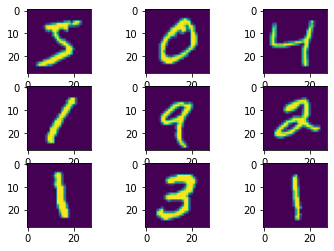

(60000, 28, 28)

In [8]:
from tensorflow.keras.datasets import mnist


(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one hot encode target values
y_train = to_categorical(y_train_full)
y_test = to_categorical(y_test)

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


for i in range(0,9):
     plt.subplot(330 + 1 + i)
     plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [9]:
# TODO: Build your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# prepare pixel data
X_train, X_test = prep_pixels(X_train, X_test)

# Get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train.shape[0])
X_valid, X_train = X_train[shuffled_indices[:5000]], X_train[shuffled_indices[5000:]]
y_valid, y_train = y_train[shuffled_indices[:5000]], y_train[shuffled_indices[5000:]]

# fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), verbose=1, callbacks=[EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)])

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.1520 - accuracy: 0.9525 - val_loss: 0.0624 - val_accuracy: 0.9828
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0632 - val_accuracy: 0.9820
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0424 - val_accuracy: 0.9880
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0396 - val_accuracy: 0.9886
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0381 - val_accuracy

In [10]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

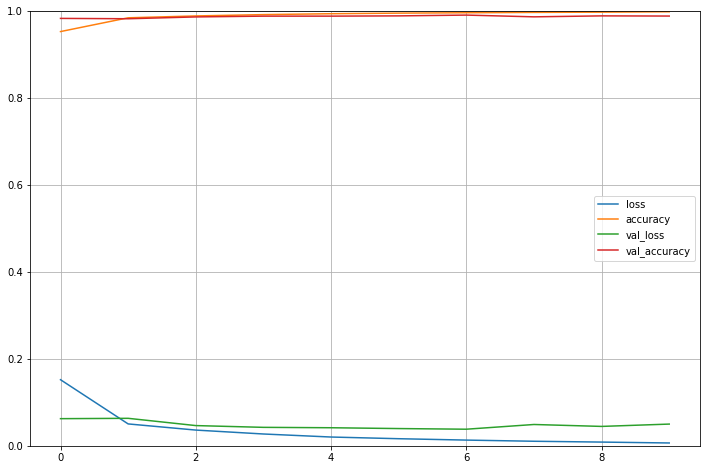

In [11]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [12]:
model.save('FDS21-M67-MNIST.h5') 

## Load the model and evaluate it on the test data

In [13]:
model = keras.models.load_model("FDS21-M67-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0395 - accuracy: 0.9893


[0.039543215185403824, 0.989300012588501]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

For this problem it was actually quite straight-forward. We just started with a couple layers of Conv2d followed by maxpooling2d, then a flatten layer and two fully-connected layers on top. This proved to work very well right away, with a 99% accuracy.
We trained the model using SGD as an optimizer and left it running for 10 epochs, with a batch size of 32. It was quite quick.